In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [11]:
import zipfile
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
dataset_path = "/content/drive/MyDrive/DATASET"
masked_images_zip = os.path.join(dataset_path, "masked_images.zip")

# Target extraction path
masked_images_path = os.path.join(dataset_path, "masked_images")

# Ensure target directory exists
os.makedirs(masked_images_path, exist_ok=True)

# Function to extract the masked images zip file
def extract_masked_images(zip_path, extract_to):
    if os.path.exists(zip_path):
        print(f"🔍 Found: {zip_path}. Extracting to {extract_to}...")
        try:
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(extract_to)
                print(f"✅ Successfully extracted {zip_path} to {extract_to}")
        except zipfile.BadZipFile:
            print(f"❌ ERROR: {zip_path} is corrupted or not a valid ZIP file.")
    else:
        print(f"❌ ERROR: {zip_path} not found!")

# Extract only masked images
extract_masked_images(masked_images_zip, masked_images_path)

# Verify extraction
if os.path.exists(masked_images_path):
    print("📂 Masked Images:", os.listdir(masked_images_path)[:5])  # Show first 5 files
else:
    print("❌ ERROR: Masked images folder not found!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔍 Found: /content/drive/MyDrive/DATASET/masked_images.zip. Extracting to /content/drive/MyDrive/DATASET/masked_images...
✅ Successfully extracted /content/drive/MyDrive/DATASET/masked_images.zip to /content/drive/MyDrive/DATASET/masked_images
📂 Masked Images: ['masked_images']


In [5]:
import zipfile
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
dataset_path = "/content/drive/MyDrive/DATASET"
resized_images_zip = os.path.join(dataset_path, "resized images.zip")

# Target extraction path
resized_images_path = os.path.join(dataset_path, "resized_images")

# Ensure target directory exists
os.makedirs(resized_images_path, exist_ok=True)

# Function to extract resized images zip file
def extract_resized_images(zip_path, extract_to):
    if os.path.exists(zip_path):
        print(f"🔍 Found: {zip_path}. Extracting to {extract_to}...")
        try:
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(extract_to)
                print(f"✅ Successfully extracted {zip_path} to {extract_to}")
        except zipfile.BadZipFile:
            print(f"❌ ERROR: {zip_path} is corrupted or not a valid ZIP file.")
    else:
        print(f"❌ ERROR: {zip_path} not found!")

# Extract only resized images
extract_resized_images(resized_images_zip, resized_images_path)

# Verify extraction
if os.path.exists(resized_images_path):
    print("📂 Resized Images:", os.listdir(resized_images_path)[:5])  # Show first 5 files
else:
    print("❌ ERROR: Resized images folder not found!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔍 Found: /content/drive/MyDrive/DATASET/resized images.zip. Extracting to /content/drive/MyDrive/DATASET/resized_images...
✅ Successfully extracted /content/drive/MyDrive/DATASET/resized images.zip to /content/drive/MyDrive/DATASET/resized_images
📂 Resized Images: ['resized images']


In [12]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the specific path for masked images
masked_images_data_path = "/content/drive/MyDrive/DATASET/masked_images/masked_images"

# Function to count files in a directory
def count_files_in_directory(directory_path):
    if os.path.exists(directory_path):
        files = os.listdir(directory_path)  # List all files and directories
        file_count = len([f for f in files if os.path.isfile(os.path.join(directory_path, f))])  # Count only files
        print(f"📂 {directory_path} contains {file_count} files.")
    else:
        print(f"❌ ERROR: Directory {directory_path} does not exist!")

# Count files in the specific masked images data directory
count_files_in_directory(masked_images_data_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📂 /content/drive/MyDrive/DATASET/masked_images/masked_images contains 2817 files.


In [13]:
import os

# Paths in Google Drive
base_dir = "/content/drive/MyDrive/DATASET"  # Updated to your 'DATASET' folder
images_dir = os.path.join(base_dir, "resized_images/resized images")  # Path for resized images
masks_dir = os.path.join(base_dir, "masked_images/masked_images")  # Path for masked images
output_dir = "/content/drive/MyDrive/DATASET/data_split2"  # Location for split dataset

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Verify output directory exists
if os.path.exists(output_dir):
    print(f"✅ Output directory exists at: {output_dir}")
else:
    print(f"❌ Output directory not found at: {output_dir}")


✅ Output directory exists at: /content/drive/MyDrive/DATASET/data_split2


In [14]:
from sklearn.model_selection import train_test_split


In [15]:
for folder in ["train", "val", "test"]:
    os.makedirs(os.path.join(output_dir, folder, "images"), exist_ok=True)
    os.makedirs(os.path.join(output_dir, folder, "masks"), exist_ok=True)

In [16]:
image_filenames = sorted(os.listdir(images_dir))
mask_filenames = sorted(os.listdir(masks_dir))


In [18]:
assert image_filenames == mask_filenames, "Image and mask filenames do not match!"

In [19]:
train_images, temp_images, train_masks, temp_masks = train_test_split(
    image_filenames, mask_filenames, test_size=0.3, random_state=42
)
val_images, test_images, val_masks, test_masks = train_test_split(
    temp_images, temp_masks, test_size=0.5, random_state=42
)


In [20]:
def copy_files(file_list, source_dir, dest_dir):
    for file in file_list:
        shutil.copy(os.path.join(source_dir, file), os.path.join(dest_dir, file))

In [21]:
copy_files(train_images, images_dir, os.path.join(output_dir, "train/images"))
copy_files(train_masks, masks_dir, os.path.join(output_dir, "train/masks"))
copy_files(val_images, images_dir, os.path.join(output_dir, "val/images"))
copy_files(val_masks, masks_dir, os.path.join(output_dir, "val/masks"))
copy_files(test_images, images_dir, os.path.join(output_dir, "test/images"))
copy_files(test_masks, masks_dir, os.path.join(output_dir, "test/masks"))

print("Dataset successfully split into train, val, and test sets!")

Dataset successfully split into train, val, and test sets!


DATA LOADER


In [22]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

In [23]:
class LaneDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.image_filenames = sorted(os.listdir(images_dir))
        self.mask_filenames = sorted(os.listdir(masks_dir))
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        # Load image and mask
        img_path = os.path.join(self.images_dir, self.image_filenames[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_filenames[idx])
        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Grayscale mask

        # Apply transforms
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

In [24]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

class LaneDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.image_filenames = sorted(os.listdir(images_dir))
        self.mask_filenames = sorted(os.listdir(masks_dir))
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        # Load image and mask
        img_path = os.path.join(self.images_dir, self.image_filenames[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_filenames[idx])
        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Grayscale mask

        # Define separate transformations for images and masks
        if self.transform:
            image = self.transform(image)
            mask = transforms.ToTensor()(mask)  # Convert mask to tensor separately

        return image, mask


In [25]:
# Define transforms for the images
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to desired shape
    transforms.ToTensor(),           # Convert image to tensor
])

# Load dataset
train_dataset = LaneDataset(
    images_dir="/content/drive/MyDrive/DATASET/data_split2/train/images",
    masks_dir="/content/drive/MyDrive/DATASET/data_split2/train/masks",
    transform=image_transform
)

# Create DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)

# Check one batch
for images, masks in train_loader:
    print("Image batch shape:", images.shape)
    print("Mask batch shape:", masks.shape)
    break



Image batch shape: torch.Size([8, 3, 256, 256])
Mask batch shape: torch.Size([8, 1, 224, 224])


In [26]:
train_images_dir = "/content/drive/MyDrive/DATASET/data_split2/train/images"
train_masks_dir = "/content/drive/MyDrive/DATASET/data_split2/train/masks"

In [27]:

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Ensure images are resized
    transforms.ToTensor()
])

In [28]:
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize image
])

mask_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()  # No normalization for masks
])


In [29]:

train_dataset = LaneDataset(train_images_dir, train_masks_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [30]:
for images, masks in train_loader:
    print("Batch of images:", images.shape)
    print("Batch of masks:", masks.shape)
    break

Batch of images: torch.Size([16, 3, 224, 224])
Batch of masks: torch.Size([16, 1, 224, 224])


In [31]:
def __getitem__(self, idx):
    img_path = os.path.join(self.images_dir, self.image_filenames[idx])
    mask_path = os.path.join(self.masks_dir, self.mask_filenames[idx])

    image = Image.open(img_path).convert("RGB")
    mask = Image.open(mask_path).convert("L")  # Grayscale mask

    if self.transform:
        image = self.transform(image)
    if self.mask_transform:
        mask = self.mask_transform(mask)

    return image, mask


In [32]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

for images, masks in train_loader:
    print("✅ Batch of images shape:", images.shape)  # (batch_size, 3, 224, 224)
    print("✅ Batch of masks shape:", masks.shape)    # (batch_size, 1, 224, 224)
    break


✅ Batch of images shape: torch.Size([16, 3, 224, 224])
✅ Batch of masks shape: torch.Size([16, 1, 224, 224])


MODEL


In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [34]:
import torch
import torch.nn as nn

class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1):
        super(UNet, self).__init__()

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Contracting Path
        self.enc1 = self.double_conv(in_channels, 64)
        self.enc2 = self.double_conv(64, 128)
        self.enc3 = self.double_conv(128, 256, dropout=True)
        self.enc4 = self.double_conv(256, 512, dropout=True)

        # Bottleneck
        self.bottleneck = self.double_conv(512, 1024, dropout=True)

        # Expanding Path
        self.upconv4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = self.double_conv(1024, 512)

        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = self.double_conv(512, 256)

        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = self.double_conv(256, 128)

        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = self.double_conv(128, 64)

        # Output Layer
        self.out = nn.Conv2d(64, out_channels, kernel_size=1)

    def double_conv(self, in_channels, out_channels, dropout=False):
        layers = [
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        ]
        if dropout:
            layers.append(nn.Dropout(0.3))  # Dropout to prevent overfitting
        return nn.Sequential(*layers)

    def forward(self, x):
        # Contracting Path
        enc1 = self.enc1(x)
        enc2 = self.enc2(self.pool(enc1))
        enc3 = self.enc3(self.pool(enc2))
        enc4 = self.enc4(self.pool(enc3))

        # Bottleneck
        bottleneck = self.bottleneck(self.pool(enc4))

        # Expanding Path
        up4 = self.upconv4(bottleneck)
        dec4 = self.dec4(torch.cat([up4, enc4], dim=1))

        up3 = self.upconv3(dec4)
        dec3 = self.dec3(torch.cat([up3, enc3], dim=1))

        up2 = self.upconv2(dec3)
        dec2 = self.dec2(torch.cat([up2, enc2], dim=1))

        up1 = self.upconv1(dec2)
        dec1 = self.dec1(torch.cat([up1, enc1], dim=1))

        return torch.sigmoid(self.out(dec1))  # Sigmoid for binary segmentation


RUN EVERYTIME


In [35]:
from torch.cuda.amp import GradScaler, autocast

In [36]:
# Initialize model, optimizer, and loss function
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.BCEWithLogitsLoss()

In [37]:
scaler = torch.amp.GradScaler()
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [38]:
import torch
from torch.cuda.amp import GradScaler, autocast

# Ensure correct GradScaler initialization
scaler = torch.cuda.amp.GradScaler()

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)
        masks = masks.float()  # Ensure masks are float for BCEWithLogitsLoss

        optimizer.zero_grad()

        with autocast():  # Mixed precision training
            outputs = model(images)
            loss = criterion(outputs, masks)

        # Backpropagation with scaler
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        epoch_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")


<ipython-input-38-1ce3e69d2326>:5: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
<ipython-input-38-1ce3e69d2326>:19: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Mixed precision training


Epoch [1/10], Loss: 93.8805
Epoch [2/10], Loss: 88.5753
Epoch [3/10], Loss: 86.3965
Epoch [4/10], Loss: 84.7712
Epoch [5/10], Loss: 83.5833
Epoch [6/10], Loss: 82.6702
Epoch [7/10], Loss: 81.9666
Epoch [8/10], Loss: 81.4229
Epoch [9/10], Loss: 81.0065
Epoch [10/10], Loss: 80.6932


In [39]:
epochs = 10
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)

        if scaler:
            with autocast():
                outputs = model(images)
                loss = criterion(outputs, masks)

            optimizer.zero_grad()
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            outputs = model(images)
            loss = criterion(outputs, masks)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")

<ipython-input-39-8d83ebefc1de>:9: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch [1/10], Loss: 80.4242
Epoch [2/10], Loss: 80.2546
Epoch [3/10], Loss: 80.0060
Epoch [4/10], Loss: 79.8715
Epoch [5/10], Loss: 79.7490
Epoch [6/10], Loss: 79.6436
Epoch [7/10], Loss: 79.5467
Epoch [8/10], Loss: 79.4735
Epoch [9/10], Loss: 79.4138
Epoch [10/10], Loss: 79.3521


In [40]:

train_dataset = LaneDataset(train_images_dir, train_masks_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Switch model to evaluation mode
model.eval()

# Function to compute Intersection over Union (IoU)
def compute_iou(pred, target, threshold=0.5):
    pred = (pred > threshold).float()
    intersection = (pred * target).sum()
    union = (pred + target).sum() - intersection
    iou = intersection / union
    return iou.item()

# Evaluate on test dataset
test_images_dir = "/content/drive/MyDrive/DATASET/data_split2/test/images"
test_masks_dir = "/content/drive/MyDrive/DATASET/data_split2/test/masks"
test_dataset = LaneDataset(test_images_dir, test_masks_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

iou_scores = []

with torch.no_grad():
    for images, masks in test_loader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)
        outputs = torch.sigmoid(outputs)  # Apply sigmoid since we used BCEWithLogitsLoss
        iou = compute_iou(outputs, masks)
        iou_scores.append(iou)

print(f"Average IoU on Test Set: {np.mean(iou_scores):.4f}")


Average IoU on Test Set: 0.1741


In [42]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.cuda.amp import GradScaler, autocast


In [43]:
class LaneDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.image_filenames = sorted(os.listdir(images_dir))
        self.mask_filenames = sorted(os.listdir(masks_dir))
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.images_dir, self.image_filenames[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_filenames[idx])

        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask


In [44]:
class LaneDataset(Dataset):
    def __init__(self, images_dir, masks_dir, image_transform=None, mask_transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.image_filenames = sorted(os.listdir(images_dir))
        self.mask_filenames = sorted(os.listdir(masks_dir))
        self.image_transform = image_transform
        self.mask_transform = mask_transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.images_dir, self.image_filenames[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_filenames[idx])

        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Convert mask to grayscale

        if self.image_transform:
            image = self.image_transform(image)
        if self.mask_transform:
            mask = self.mask_transform(mask)

        return image, mask


In [45]:
import torch.nn as nn
import torch.nn.functional as F

class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1):
        super(UNet, self).__init__()

        # Contracting Path
        self.enc1 = self.double_conv(in_channels, 64)
        self.enc2 = self.double_conv(64, 128)
        self.enc3 = self.double_conv(128, 256)
        self.enc4 = self.double_conv(256, 512)

        # Bottleneck
        self.bottleneck = self.double_conv(512, 1024)

        # Expanding Path
        self.upconv4 = self.upconv(1024, 512)
        self.dec4 = self.double_conv(1024, 512)

        self.upconv3 = self.upconv(512, 256)
        self.dec3 = self.double_conv(512, 256)

        self.upconv2 = self.upconv(256, 128)
        self.dec2 = self.double_conv(256, 128)

        self.upconv1 = self.upconv(128, 64)
        self.dec1 = self.double_conv(128, 64)

        # Output Layer
        self.out = nn.Conv2d(64, out_channels, kernel_size=1)

    def double_conv(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def upconv(self, in_channels, out_channels):
        return nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)

    def forward(self, x):
        # Contracting Path
        enc1 = self.enc1(x)
        enc2 = self.enc2(F.max_pool2d(enc1, kernel_size=2))
        enc3 = self.enc3(F.max_pool2d(enc2, kernel_size=2))
        enc4 = self.enc4(F.max_pool2d(enc3, kernel_size=2))

        # Bottleneck
        bottleneck = self.bottleneck(F.max_pool2d(enc4, kernel_size=2))

        # Expanding Path
        up4 = self.upconv4(bottleneck)
        dec4 = self.dec4(torch.cat([up4, enc4], dim=1))

        up3 = self.upconv3(dec4)
        dec3 = self.dec3(torch.cat([up3, enc3], dim=1))

        up2 = self.upconv2(dec3)
        dec2 = self.dec2(torch.cat([up2, enc2], dim=1))

        up1 = self.upconv1(dec2)
        dec1 = self.dec1(torch.cat([up1, enc1], dim=1))

        # Output Layer (logits)
        return self.out(dec1)


In [46]:
import os
import torch
import cv2
import numpy as np
from torch.utils.data import Dataset
from torchvision import transforms

class LaneDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.image_filenames = sorted(os.listdir(images_dir))
        self.mask_filenames = sorted(os.listdir(masks_dir))
        self.transform = transform  # Store transform function

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.images_dir, self.image_filenames[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_filenames[idx])

        image = cv2.imread(img_path)  # Read image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Read mask (grayscale)

        # Normalize mask (convert to binary if needed)
        mask = (mask > 128).astype(np.float32)

        # Convert NumPy arrays to PIL Image
        image = transforms.ToPILImage()(image)
        mask = transforms.ToPILImage()(mask)

        # Apply transformations if provided
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask


In [47]:
from torchvision import transforms
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match UNet input
    transforms.ToTensor(),  # Convert to tensor
])

# Paths
train_images_dir = "/content/drive/MyDrive/DATASET/data_split2/train/images"
train_masks_dir = "/content/drive/MyDrive/DATASET/data_split2/train/masks"
test_images_dir = "/content/drive/MyDrive/DATASET/data_split2/test/images"
test_masks_dir = "/content/drive/MyDrive/DATASET/data_split2/test/masks"

# Create dataset instances
train_dataset = LaneDataset(train_images_dir, train_masks_dir, transform=transform)
test_dataset = LaneDataset(test_images_dir, test_masks_dir, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


In [48]:
import torch.optim as optim
from torch.cuda.amp import GradScaler, autocast

# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet().to(device)

# Loss and Optimizer
criterion = nn.BCEWithLogitsLoss()  # Best for binary segmentation
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scaler = GradScaler()
epochs = 10


<ipython-input-48-a0dd626bcfd0>:11: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


In [49]:
# Dice Loss Function
def dice_loss(pred, target, smooth=1e-6):
    pred = torch.sigmoid(pred)  # Apply sigmoid since BCEWithLogitsLoss is used
    pred = pred.view(-1)
    target = target.view(-1)
    intersection = (pred * target).sum()
    union = pred.sum() + target.sum()
    dice = (2. * intersection + smooth) / (union + smooth)
    return 1 - dice  # Dice loss is 1 - Dice score

# Training Loop
for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)

        with autocast():
            outputs = model(images)
            bce_loss = criterion(outputs, masks)
            dice_loss_val = dice_loss(outputs, masks)
            total_loss = bce_loss + dice_loss_val

        optimizer.zero_grad()
        scaler.scale(total_loss).backward()
        scaler.step(optimizer)
        scaler.update()

        epoch_loss += total_loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")


<ipython-input-49-d7862d2825fa>:19: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch [1/10], Loss: 93.0060
Epoch [2/10], Loss: 68.9143
Epoch [3/10], Loss: 58.3090
Epoch [4/10], Loss: 49.8446
Epoch [5/10], Loss: 42.8475
Epoch [6/10], Loss: 37.4071
Epoch [7/10], Loss: 32.6945
Epoch [8/10], Loss: 29.2618
Epoch [9/10], Loss: 26.3734
Epoch [10/10], Loss: 24.0428


In [50]:
import numpy as np

# Intersection over Union (IoU) function
def compute_iou(pred, target, threshold=0.5):
    pred = torch.sigmoid(pred)  # Apply sigmoid to convert logits to probability
    pred = (pred > threshold).float()
    intersection = (pred * target).sum()
    union = (pred + target).sum() - intersection
    return (intersection / union).item()

# Evaluate on Test Set
model.eval()
iou_scores = []

with torch.no_grad():
    for images, masks in test_loader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)
        iou = compute_iou(outputs, masks)
        iou_scores.append(iou)

print(f"Average IoU on Test Set: {np.mean(iou_scores):.4f}")


Average IoU on Test Set: 0.8967


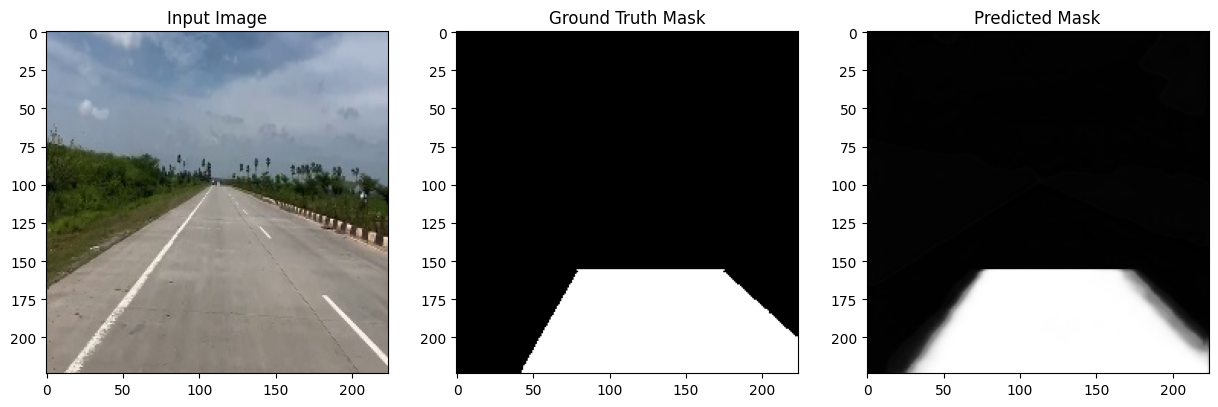

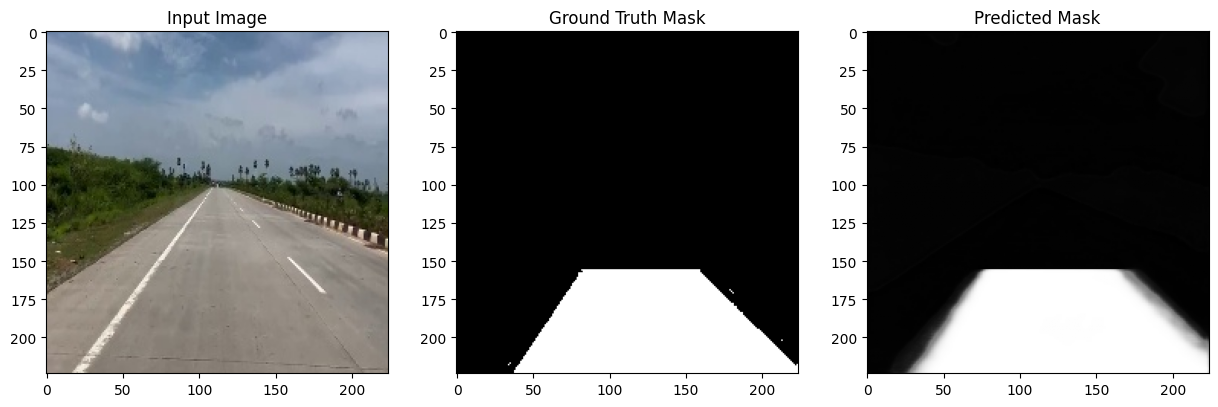

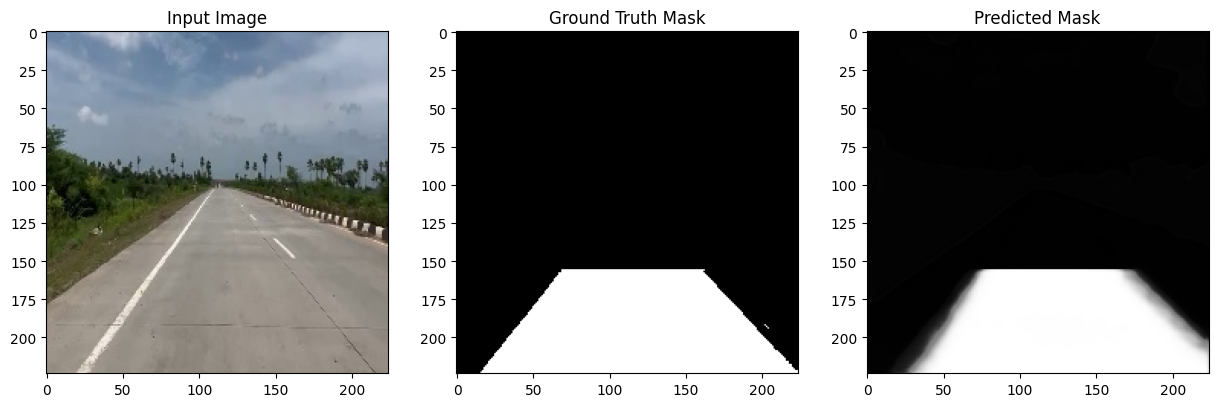

In [51]:
import matplotlib.pyplot as plt

# Visualize Predictions
model.eval()
with torch.no_grad():
    for i, (images, masks) in enumerate(test_loader):
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)
        outputs = torch.sigmoid(outputs)  # Convert to probability

        # Plot images
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        axes[0].imshow(images[0].cpu().numpy().transpose(1, 2, 0))
        axes[0].set_title("Input Image")
        axes[1].imshow(masks[0].cpu().numpy().squeeze(), cmap='gray')
        axes[1].set_title("Ground Truth Mask")
        axes[2].imshow(outputs[0].cpu().numpy().squeeze(), cmap='gray')
        axes[2].set_title("Predicted Mask")
        plt.show()

        if i == 2:  # Show only first 3 images
            break


In [52]:
import torch

# Define the save path inside Google Drive
save_path = "/content/drive/MyDrive/DATASET/lane_detection_model.pth"

# Save the entire model
torch.save(model, save_path)

# Save only model weights (recommended)
torch.save(model.state_dict(), "/content/drive/MyDrive/DATASET/lane_detection_model_state.pth")

print(f"Model saved at: {save_path}")


Model saved at: /content/drive/MyDrive/DATASET/lane_detection_model.pth


In [53]:
from google.colab import drive
drive.mount('/content/drive')

# Load entire model
model = torch.load("/content/drive/MyDrive/DATASET/lane_detection_model.pth")
model.eval()

# Load only state_dict (recommended)
model.load_state_dict(torch.load("/content/drive/MyDrive/DATASET/lane_detection_model_state.pth"))
model.eval()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL __main__.UNet was not an allowed global by default. Please use `torch.serialization.add_safe_globals([UNet])` or the `torch.serialization.safe_globals([UNet])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

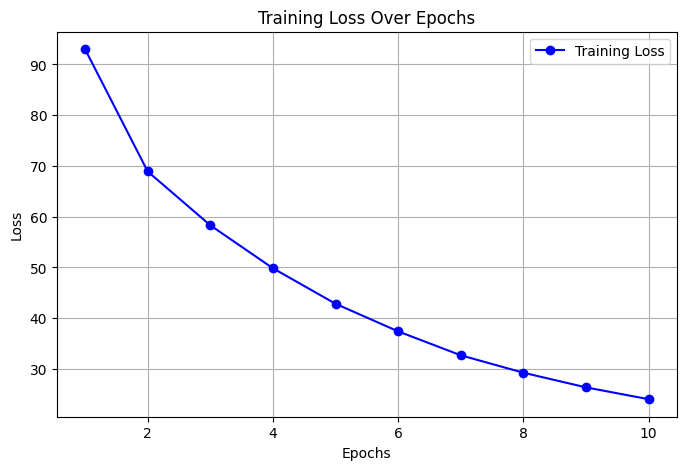

In [57]:
import matplotlib.pyplot as plt

# Your recorded loss values
epochs = list(range(1, 11))  # Epoch numbers
train_losses = [93.0060, 68.9143, 58.3090, 49.8446, 42.8475, 37.4071, 32.6945, 29.2618, 26.3734, 24.0428]

# Plot
plt.figure(figsize=(8,5))
plt.plot(epochs, train_losses, marker='o', linestyle='-', color='b', label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()


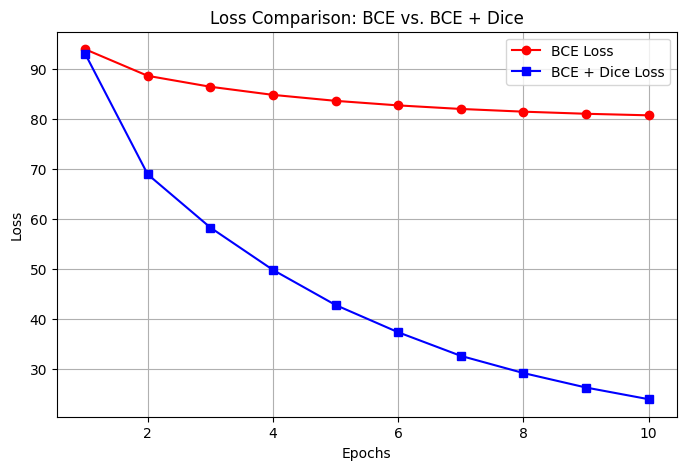

In [58]:
import matplotlib.pyplot as plt

epochs = list(range(1, 11))

# BCE-only loss values
bce_loss = [93.88, 88.57, 86.39, 84.77, 83.58, 82.67, 81.96, 81.42, 81.00, 80.69]

# BCE + Dice loss values
bce_dice_loss = [93.00, 68.91, 58.30, 49.84, 42.84, 37.40, 32.69, 29.26, 26.37, 24.04]

plt.figure(figsize=(8, 5))
plt.plot(epochs, bce_loss, marker='o', linestyle='-', color='red', label="BCE Loss")
plt.plot(epochs, bce_dice_loss, marker='s', linestyle='-', color='blue', label="BCE + Dice Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Comparison: BCE vs. BCE + Dice")
plt.legend()
plt.grid()
plt.show()


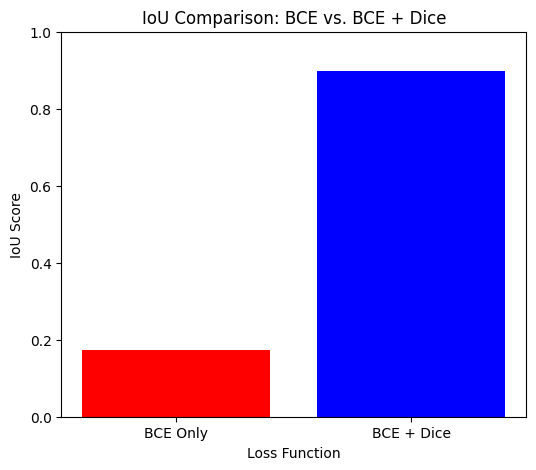

In [59]:
import matplotlib.pyplot as plt

# IoU values for BCE and BCE + Dice
loss_functions = ["BCE Only", "BCE + Dice"]
iou_values = [0.1741, 0.8967]  # Your IoU results

plt.figure(figsize=(6, 5))
plt.bar(loss_functions, iou_values, color=['red', 'blue'])
plt.xlabel("Loss Function")
plt.ylabel("IoU Score")
plt.title("IoU Comparison: BCE vs. BCE + Dice")
plt.ylim(0, 1)  # IoU range (0 to 1)
plt.show()


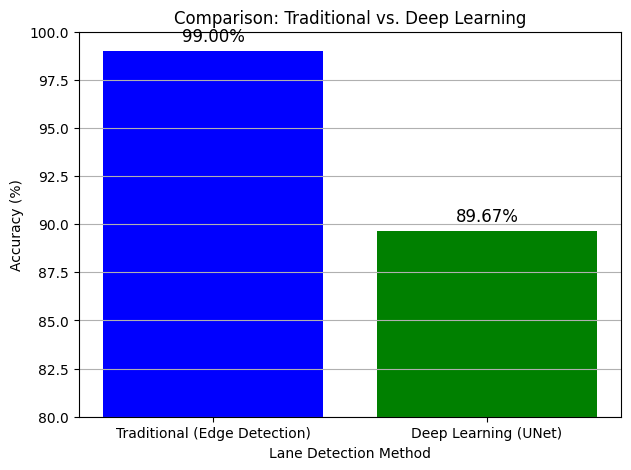

In [66]:
import matplotlib.pyplot as plt

# Accuracy values
methods = ["Traditional (Edge Detection)", "Deep Learning (UNet)"]
accuracy = [99, 89.67]  # Replace with exact IoU if needed

# Plot the bar chart
plt.figure(figsize=(7,5))
plt.bar(methods, accuracy, color=['blue', 'green'])
plt.xlabel("Lane Detection Method")
plt.ylabel("Accuracy (%)")
plt.title("Comparison: Traditional vs. Deep Learning")
plt.ylim(80, 100)  # Set y-axis range for better visualization
plt.grid(axis='y')

# Display the values on bars
for i, v in enumerate(accuracy):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=12)

plt.show()


In [55]:
import cv2
import torch
import numpy as np
from PIL import Image
from torchvision import transforms

def process_video(input_video, output_video="output_video.mp4"):
    cap = cv2.VideoCapture(input_video)

    if not cap.isOpened():
        print("Error: Could not open video file.")
        return

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

    model.eval()  # Ensure model is in evaluation mode

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break  # Stop if video ends

        # Preprocess frame
        frame_resized = cv2.resize(frame, (224, 224))
        input_tensor = transform(Image.fromarray(frame_resized)).unsqueeze(0).to(device)

        with torch.no_grad():
            mask = model(input_tensor)
            mask = (torch.sigmoid(mask).squeeze().cpu().numpy() > 0.5).astype(np.uint8)
            mask = cv2.resize(mask, (width, height), interpolation=cv2.INTER_LINEAR) * 255

        # Overlay lane mask on original frame
        overlay = frame.copy()
        overlay[mask > 0] = [0, 255, 0]  # Green overlay for detected lane
        combined = cv2.addWeighted(frame, 0.7, overlay, 0.3, 0)

        out.write(combined)

    cap.release()
    out.release()
    print(f"Processed video saved as: {output_video}")

# Example usage
process_video("/content/straight input2.mp4", "lane_detection_output.mp4")


Processed video saved as: lane_detection_output.mp4


In [56]:
torch.save(model, "lane_detection_full_model.pth")


In [ ]:
model = torch.load("lane_detection_full_model.pth", map_location=device)
model.eval()


In [ ]:
import cv2
import torch
import numpy as np
from PIL import Image
from torchvision import transforms

class LaneTracker:
    def __init__(self, process_variance=0.1, measurement_variance=0.1, ema_alpha=0.6):
        self.kalman = cv2.KalmanFilter(4, 2)  # 4 state (x, y, dx, dy), 2 measurement (x, y)
        self.kalman.transitionMatrix = np.array([[1, 0, 1, 0],
                                                 [0, 1, 0, 1],
                                                 [0, 0, 1, 0],
                                                 [0, 0, 0, 1]], dtype=np.float32)
        self.kalman.measurementMatrix = np.array([[1, 0, 0, 0],
                                                  [0, 1, 0, 0]], dtype=np.float32)
        self.kalman.processNoiseCov = np.eye(4, dtype=np.float32) * process_variance
        self.kalman.measurementNoiseCov = np.eye(2, dtype=np.float32) * measurement_variance
        self.ema_alpha = ema_alpha  # Smoothing factor for EMA
        self.prev_mask = None

    def update(self, detected_pts):
        if detected_pts is not None:
            self.kalman.correct(np.array(detected_pts, dtype=np.float32))
        return self.kalman.predict()[:2].flatten()

    def smooth_mask(self, mask):
        if self.prev_mask is None:
            self.prev_mask = mask.astype(np.float32)
        else:
            self.prev_mask = (self.ema_alpha * mask + (1 - self.ema_alpha) * self.prev_mask).astype(np.uint8)
        return self.prev_mask

def process_video(input_video, output_video="output_video.mp4"):
    cap = cv2.VideoCapture(input_video)

    if not cap.isOpened():
        print("Error: Could not open video file.")
        return

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

    model.eval()  # Ensure model is in evaluation mode
    tracker = LaneTracker()

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Preprocess frame
        frame_resized = cv2.resize(frame, (224, 224))
        input_tensor = transform(Image.fromarray(frame_resized)).unsqueeze(0).to(device)

        with torch.no_grad():
            mask = model(input_tensor)
            mask = (torch.sigmoid(mask).squeeze().cpu().numpy() > 0.5).astype(np.uint8)
            mask = cv2.resize(mask, (width, height), interpolation=cv2.INTER_LINEAR) * 255

        # Morphological processing for better continuity
        kernel = np.ones((5, 5), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

        # Apply EMA smoothing
        mask = tracker.smooth_mask(mask)

        # Find lane positions
        lane_pts = cv2.findNonZero(mask)
        if lane_pts is not None:
            avg_lane_pos = np.mean(lane_pts, axis=0).flatten()
            tracked_pos = tracker.update(avg_lane_pos)

        # Overlay lane mask on original frame
        overlay = frame.copy()
        overlay[mask > 0] = [0, 255, 0]  # Green overlay for detected lane
        combined = cv2.addWeighted(frame, 0.7, overlay, 0.3, 0)

        out.write(combined)

    cap.release()
    out.release()
    print(f"Processed video saved as: {output_video}")

# Example usage
process_video("/content/straight input2.mp4", "lane_detection_output_kalman_ema.mp4")


In [ ]:
import cv2
import torch
import numpy as np
from PIL import Image
from torchvision import transforms

# Load trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.load("/content/lane_detection_full_model.pth", map_location=device)
model.eval()

# Kalman Filter Setup
kalman = cv2.KalmanFilter(4, 2)  # 4 state variables, 2 measurements
kalman.measurementMatrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0]], np.float32)
kalman.transitionMatrix = np.array([[1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32)
kalman.processNoiseCov = np.eye(4, dtype=np.float32) * 0.03

# EMA Parameters
alpha = 0.6  # Adjust for smoother offset tracking
ema_offset = 0  # Initial EMA offset

def process_video(input_video, output_video="output_video.mp4"):
    cap = cv2.VideoCapture(input_video)
    if not cap.isOpened():
        print("Error: Could not open video file.")
        return

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

    prev_hybrid_offset = None

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_resized = cv2.resize(frame, (224, 224))
        input_tensor = transform(Image.fromarray(frame_resized)).unsqueeze(0).to(device)

        with torch.no_grad():
            mask = model(input_tensor)
            mask = (torch.sigmoid(mask).squeeze().cpu().numpy() > 0.5).astype(np.uint8)
            mask = cv2.resize(mask, (width, height), interpolation=cv2.INTER_LINEAR) * 255

        # Calculate lane offset
        lane_center = np.mean(np.where(mask > 0)[1]) if np.any(mask > 0) else width // 2
        frame_center = width // 2
        measured_offset = lane_center - frame_center

        # Apply Kalman and EMA Filtering
        prediction = kalman.predict()
        estimated_offset = prediction[0][0]
        measurement = np.array([[np.float32(measured_offset)], [0]], np.float32)
        kalman.correct(measurement)
        global ema_offset
        ema_offset = alpha * measured_offset + (1 - alpha) * ema_offset
        hybrid_offset = (estimated_offset + ema_offset) / 2

        prev_hybrid_offset = hybrid_offset

        # Overlay lane mask
        overlay = frame.copy()
        overlay[mask > 0] = [0, 255, 0]
        combined = cv2.addWeighted(frame, 0.7, overlay, 0.3, 0)

        # Display offsets
        cv2.putText(combined, f"Hybrid Offset: {int(hybrid_offset)} px", (10, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

        out.write(combined)

    cap.release()
    out.release()
    print(f"Processed video saved as: {output_video}")

# Example usage
process_video("/content/straight input2.mp4", "lane_detection_output.mp4")


In [ ]:
import cv2
import torch
import numpy as np
from PIL import Image
from torchvision import transforms

# Load trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.load("/content/lane_detection_full_model.pth", map_location=device)
model.eval()

# Kalman Filter Setup (More Stable)
kalman = cv2.KalmanFilter(4, 2)
kalman.measurementMatrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0]], np.float32)
kalman.transitionMatrix = np.array([[1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32)
kalman.processNoiseCov = np.eye(4, dtype=np.float32) * 0.01  # Lower noise for smoother tracking

# EMA Parameters
alpha = 0.8  # Higher smoothing
ema_offset = 0

def process_video(input_video, output_video="output_video.mp4"):
    cap = cv2.VideoCapture(input_video)
    if not cap.isOpened():
        print("Error: Could not open video file.")
        return

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

    transform = transforms.Compose([
        transforms.Resize((256, 256)),  # Keeps aspect ratio
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])  # Normalize input
    ])

    prev_lane_center = None

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_resized = cv2.resize(frame, (256, 256))
        input_tensor = transform(Image.fromarray(frame_resized)).unsqueeze(0).to(device)

        with torch.no_grad():
            mask = model(input_tensor)
            mask = (torch.sigmoid(mask).squeeze().cpu().numpy() > 0.5).astype(np.uint8)
            mask = cv2.resize(mask, (width, height), interpolation=cv2.INTER_LINEAR) * 255

        # **Morphological filtering to stabilize lanes**
        kernel = np.ones((5, 5), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)

        # Calculate lane position with previous frame stability
        lane_pixels = np.where(mask > 0)
        if lane_pixels[0].size > 0:
            lane_center = np.mean(lane_pixels[1])  # X-axis mean
            if prev_lane_center is not None:
                lane_center = 0.8 * prev_lane_center + 0.2 * lane_center  # Smooth transition
        else:
            lane_center = prev_lane_center if prev_lane_center is not None else width // 2

        prev_lane_center = lane_center  # Store previous frame value

        # Calculate lane offset
        frame_center = width // 2
        measured_offset = lane_center - frame_center

        # Apply Kalman and EMA Filtering
        prediction = kalman.predict()
        estimated_offset = prediction[0][0]
        measurement = np.array([[np.float32(measured_offset)], [0]], np.float32)
        kalman.correct(measurement)

        global ema_offset
        ema_offset = alpha * measured_offset + (1 - alpha) * ema_offset
        hybrid_offset = (estimated_offset + ema_offset) / 2

        # Overlay lane mask
        overlay = frame.copy()
        overlay[mask > 0] = [0, 255, 0]  # Green color lane
        combined = cv2.addWeighted(frame, 0.7, overlay, 0.3, 0)

        # Display lane offset text
        cv2.putText(combined, f"Hybrid Offset: {int(hybrid_offset)} px", (10, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

        out.write(combined)

    cap.release()
    out.release()
    print(f"Processed video saved as: {output_video}")

# Example usage
process_video("/content/straight input2.mp4", "lane_detection_output.mp4")
